In [28]:
import pickle 
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

def unpickle(file):
    with open(file, 'rb') as fo:
        dict = pickle.load(fo, encoding='bytes')
    return dict

# Showing the Imgages and seperating them

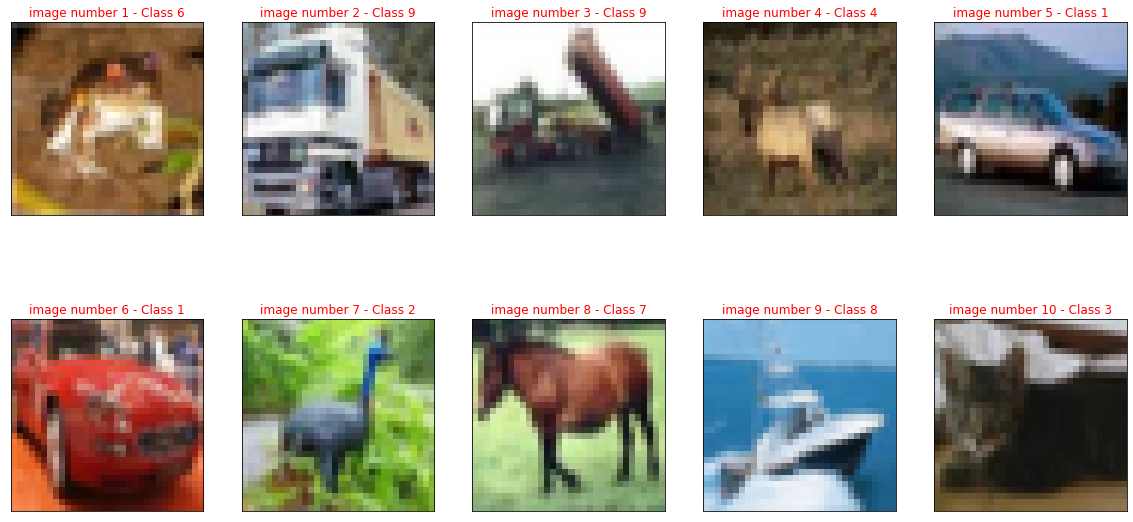

In [29]:
file_name = "datas/data_batch_{0}".format(1)
train = unpickle(file_name)

data = train[b'data']
labels = train[b'labels']

fig, axes = plt.subplots(2, 5, figsize=(20,10))

for i, ax in enumerate(axes.flat):
    R = data[i,0:32*32]
    G = data[i,32*32:32*32*2]
    B = data[i,2*32*32:32*32*3]
    img = np.zeros((32,32,3))
    img[:,:,0] = R.reshape(32,32)
    img[:,:,1] = G.reshape(32,32)
    img[:,:,2] = B.reshape(32,32)
    ax.imshow(img/255)
    ax.set_title("image number {0} - Class {1}".format(i+1, labels[i]), color='r')
    ax.set_xticks([])
    ax.set_yticks([])

In [50]:
file_name = "datas/data_batch_{0}".format(1)
train = unpickle(file_name)
for i in range(2,5):
    file_name = "datas/data_batch_{0}".format(i)
    train.update(unpickle(file_name))

file_name = "datas/data_batch_{0}".format(5)
validation = unpickle(file_name)

file_name = "datas/test_batch"
test = unpickle(file_name)

num_classes = 10
feature_vector_length = 32*32*3
input_shape = (feature_vector_length,)

X_train = train[b'data']/255
Y_train = tf.keras.utils.to_categorical(train[b'labels'], num_classes)

X_validation = validation[b'data']/255
Y_validation = tf.keras.utils.to_categorical(validation[b'labels'], num_classes)

X_test = test[b'data']/255
Y_test = tf.keras.utils.to_categorical(test[b'labels'], num_classes)

### Part a - ReLU

#### batch size = 32

In [56]:
batch_size = 32
epochs_number = 20
learning_rate = 1e-3

hl1_nn = feature_vector_length
hl2_nn = feature_vector_length/2

model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Dense(hl1_nn, input_shape=input_shape, activation='relu'))
model.add(tf.keras.layers.Dense(hl2_nn, activation='relu'))
model.add(tf.keras.layers.Dense(num_classes, activation='softmax'))

optimizer = tf.keras.optimizers.SGD(learning_rate=learning_rate, momentum=0.05)
model.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])
model.fit(X_train, Y_train, epochs=epochs_number, batch_size=batch_size, validation_data=(X_validation, Y_validation))

test_results = model.evaluate(X_test, Y_test, verbose=1)
print(f'Test results - Loss: {test_results[0]} - Accuracy: {test_results[1]}%')

Epoch 1/20
313/313 [==============================] - 15s 48ms/step - loss: 2.1757 - accuracy: 0.2186 - val_loss: 2.0839 - val_accuracy: 0.2655
Epoch 2/20
313/313 [==============================] - 13s 43ms/step - loss: 2.0258 - accuracy: 0.2947 - val_loss: 1.9869 - val_accuracy: 0.3098
Epoch 3/20
313/313 [==============================] - 14s 46ms/step - loss: 1.9543 - accuracy: 0.3237 - val_loss: 1.9395 - val_accuracy: 0.3188
Epoch 4/20
313/313 [==============================] - 16s 50ms/step - loss: 1.9090 - accuracy: 0.3414 - val_loss: 1.9170 - val_accuracy: 0.3293
Epoch 5/20
313/313 [==============================] - 15s 47ms/step - loss: 1.8741 - accuracy: 0.3565 - val_loss: 1.8830 - val_accuracy: 0.3410
Epoch 6/20
313/313 [==============================] - 14s 44ms/step - loss: 1.8466 - accuracy: 0.3621 - val_loss: 1.8617 - val_accuracy: 0.3488
Epoch 7/20
313/313 [==============================] - 14s 44ms/step - loss: 1.8252 - accuracy: 0.3716 - val_loss: 1.8550 - val_accuracy:

#### batch size = 64

In [57]:
batch_size = 64
epochs_number = 20
learning_rate = 1e-3

hl1_nn = feature_vector_length
hl2_nn = feature_vector_length/2

model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Dense(hl1_nn, input_shape=input_shape, activation='relu'))
model.add(tf.keras.layers.Dense(hl2_nn, activation='relu'))
model.add(tf.keras.layers.Dense(num_classes, activation='softmax'))

optimizer = tf.keras.optimizers.SGD(learning_rate=learning_rate, momentum=0.05)
model.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])
model.fit(X_train, Y_train, epochs=epochs_number, batch_size=batch_size, validation_data=(X_validation, Y_validation))

test_results = model.evaluate(X_test, Y_test, verbose=1)
print(f'Test results - Loss: {test_results[0]} - Accuracy: {test_results[1]}%')

Epoch 1/20
157/157 [==============================] - 10s 61ms/step - loss: 2.2230 - accuracy: 0.1923 - val_loss: 2.1489 - val_accuracy: 0.2563
Epoch 2/20
157/157 [==============================] - 9s 59ms/step - loss: 2.1051 - accuracy: 0.2655 - val_loss: 2.0705 - val_accuracy: 0.2977
Epoch 3/20
157/157 [==============================] - 9s 54ms/step - loss: 2.0383 - accuracy: 0.2924 - val_loss: 2.0219 - val_accuracy: 0.2922
Epoch 4/20
157/157 [==============================] - 9s 59ms/step - loss: 1.9930 - accuracy: 0.3081 - val_loss: 1.9871 - val_accuracy: 0.3127
Epoch 5/20
157/157 [==============================] - 9s 56ms/step - loss: 1.9579 - accuracy: 0.3249 - val_loss: 1.9559 - val_accuracy: 0.3190
Epoch 6/20
157/157 [==============================] - 9s 55ms/step - loss: 1.9295 - accuracy: 0.3371 - val_loss: 1.9326 - val_accuracy: 0.3247
Epoch 7/20
157/157 [==============================] - 9s 55ms/step - loss: 1.9069 - accuracy: 0.3429 - val_loss: 1.9161 - val_accuracy: 0.330

#### batch size = 256

In [58]:
batch_size = 256
epochs_number = 20
learning_rate = 1e-3

hl1_nn = feature_vector_length
hl2_nn = feature_vector_length/2

model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Dense(hl1_nn, input_shape=input_shape, activation='relu'))
model.add(tf.keras.layers.Dense(hl2_nn, activation='relu'))
model.add(tf.keras.layers.Dense(num_classes, activation='softmax'))

optimizer = tf.keras.optimizers.SGD(learning_rate=learning_rate, momentum=0.05)
model.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])
model.fit(X_train, Y_train, epochs=epochs_number, batch_size=batch_size, validation_data=(X_validation, Y_validation))

test_results = model.evaluate(X_test, Y_test, verbose=1)
print(f'Test results - Loss: {test_results[0]} - Accuracy: {test_results[1]}%')

Epoch 1/20
40/40 [==============================] - 7s 161ms/step - loss: 2.3209 - accuracy: 0.1144 - val_loss: 2.2826 - val_accuracy: 0.1393
Epoch 2/20
40/40 [==============================] - 6s 142ms/step - loss: 2.2595 - accuracy: 0.1696 - val_loss: 2.2352 - val_accuracy: 0.1653
Epoch 3/20
40/40 [==============================] - 6s 152ms/step - loss: 2.2155 - accuracy: 0.2053 - val_loss: 2.1977 - val_accuracy: 0.2276
Epoch 4/20
40/40 [==============================] - 7s 170ms/step - loss: 2.1802 - accuracy: 0.2370 - val_loss: 2.1681 - val_accuracy: 0.2446
Epoch 5/20
40/40 [==============================] - 6s 157ms/step - loss: 2.1508 - accuracy: 0.2568 - val_loss: 2.1411 - val_accuracy: 0.2512
Epoch 6/20
40/40 [==============================] - 6s 152ms/step - loss: 2.1250 - accuracy: 0.2594 - val_loss: 2.1173 - val_accuracy: 0.2593
Epoch 7/20
40/40 [==============================] - 6s 152ms/step - loss: 2.1029 - accuracy: 0.2711 - val_loss: 2.0992 - val_accuracy: 0.2546
Epoch 

### Part b - tanh

#### batch size = 32

In [62]:
batch_size = 32
epochs_number = 20
learning_rate = 1e-3

hl1_nn = feature_vector_length
hl2_nn = feature_vector_length/2

model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Dense(hl1_nn, input_shape=input_shape, activation='tanh'))
model.add(tf.keras.layers.Dense(hl2_nn, activation='tanh'))
model.add(tf.keras.layers.Dense(num_classes, activation='softmax'))

optimizer = tf.keras.optimizers.SGD(learning_rate=learning_rate, momentum=0.05)
model.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])
model.fit(X_train, Y_train, epochs=epochs_number, batch_size=batch_size, validation_data=(X_validation, Y_validation))

test_results = model.evaluate(X_test, Y_test, verbose=1)
print(f'Test results - Loss: {test_results[0]} - Accuracy: {test_results[1]}%')

Epoch 1/20
313/313 [==============================] - 15s 47ms/step - loss: 2.1461 - accuracy: 0.2175 - val_loss: 2.0415 - val_accuracy: 0.2821
Epoch 2/20
313/313 [==============================] - 13s 42ms/step - loss: 1.9817 - accuracy: 0.3009 - val_loss: 1.9473 - val_accuracy: 0.3115
Epoch 3/20
313/313 [==============================] - 14s 44ms/step - loss: 1.9144 - accuracy: 0.3374 - val_loss: 1.9063 - val_accuracy: 0.3333
Epoch 4/20
313/313 [==============================] - 15s 46ms/step - loss: 1.8722 - accuracy: 0.3521 - val_loss: 1.9071 - val_accuracy: 0.3058
Epoch 5/20
313/313 [==============================] - 13s 42ms/step - loss: 1.8437 - accuracy: 0.3618 - val_loss: 1.8584 - val_accuracy: 0.3524
Epoch 6/20
313/313 [==============================] - 14s 45ms/step - loss: 1.8225 - accuracy: 0.3722 - val_loss: 1.8544 - val_accuracy: 0.3520
Epoch 7/20
313/313 [==============================] - 14s 46ms/step - loss: 1.8044 - accuracy: 0.3791 - val_loss: 1.8297 - val_accuracy:

#### batch size = 64

In [63]:
batch_size = 64
epochs_number = 20
learning_rate = 1e-3

hl1_nn = feature_vector_length
hl2_nn = feature_vector_length/2

model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Dense(hl1_nn, input_shape=input_shape, activation='tanh'))
model.add(tf.keras.layers.Dense(hl2_nn, activation='tanh'))
model.add(tf.keras.layers.Dense(num_classes, activation='softmax'))

optimizer = tf.keras.optimizers.SGD(learning_rate=learning_rate, momentum=0.05)
model.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])
model.fit(X_train, Y_train, epochs=epochs_number, batch_size=batch_size, validation_data=(X_validation, Y_validation))

test_results = model.evaluate(X_test, Y_test, verbose=1)
print(f'Test results - Loss: {test_results[0]} - Accuracy: {test_results[1]}%')

Epoch 1/20
157/157 [==============================] - 10s 61ms/step - loss: 2.2186 - accuracy: 0.1787 - val_loss: 2.1262 - val_accuracy: 0.2342
Epoch 2/20
157/157 [==============================] - 9s 58ms/step - loss: 2.0690 - accuracy: 0.2732 - val_loss: 2.0382 - val_accuracy: 0.2761
Epoch 3/20
157/157 [==============================] - 9s 57ms/step - loss: 2.0011 - accuracy: 0.3015 - val_loss: 1.9927 - val_accuracy: 0.3027
Epoch 4/20
157/157 [==============================] - 10s 61ms/step - loss: 1.9567 - accuracy: 0.3179 - val_loss: 1.9544 - val_accuracy: 0.3101
Epoch 5/20
157/157 [==============================] - 9s 58ms/step - loss: 1.9222 - accuracy: 0.3334 - val_loss: 1.9387 - val_accuracy: 0.3101
Epoch 6/20
157/157 [==============================] - 9s 58ms/step - loss: 1.8991 - accuracy: 0.3440 - val_loss: 1.9069 - val_accuracy: 0.3315
Epoch 7/20
157/157 [==============================] - 9s 59ms/step - loss: 1.8780 - accuracy: 0.3503 - val_loss: 1.8875 - val_accuracy: 0.33

#### batch size = 256

In [64]:
batch_size = 256
epochs_number = 20
learning_rate = 1e-3

hl1_nn = feature_vector_length
hl2_nn = feature_vector_length/2

model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Dense(hl1_nn, input_shape=input_shape, activation='tanh'))
model.add(tf.keras.layers.Dense(hl2_nn, activation='tanh'))
model.add(tf.keras.layers.Dense(num_classes, activation='softmax'))

optimizer = tf.keras.optimizers.SGD(learning_rate=learning_rate, momentum=0.05)
model.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])
model.fit(X_train, Y_train, epochs=epochs_number, batch_size=batch_size, validation_data=(X_validation, Y_validation))

test_results = model.evaluate(X_test, Y_test, verbose=1)
print(f'Test results - Loss: {test_results[0]} - Accuracy: {test_results[1]}%')

Epoch 1/20
40/40 [==============================] - 7s 163ms/step - loss: 2.2659 - accuracy: 0.1458 - val_loss: 2.2330 - val_accuracy: 0.1696
Epoch 2/20
40/40 [==============================] - 6s 151ms/step - loss: 2.1976 - accuracy: 0.2008 - val_loss: 2.1772 - val_accuracy: 0.2138
Epoch 3/20
40/40 [==============================] - 7s 165ms/step - loss: 2.1492 - accuracy: 0.2341 - val_loss: 2.1538 - val_accuracy: 0.1983
Epoch 4/20
40/40 [==============================] - 6s 157ms/step - loss: 2.1132 - accuracy: 0.2511 - val_loss: 2.1123 - val_accuracy: 0.2252
Epoch 5/20
40/40 [==============================] - 6s 146ms/step - loss: 2.0823 - accuracy: 0.2676 - val_loss: 2.0916 - val_accuracy: 0.2419
Epoch 6/20
40/40 [==============================] - 6s 157ms/step - loss: 2.0578 - accuracy: 0.2831 - val_loss: 2.0602 - val_accuracy: 0.2684
Epoch 7/20
40/40 [==============================] - 6s 164ms/step - loss: 2.0362 - accuracy: 0.2911 - val_loss: 2.0438 - val_accuracy: 0.2812
Epoch 